In [2]:
image = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/frames/0_0.png'

In [2]:
import easyocr
import sys
reader = easyocr.Reader(['en'])
sys.path.append('/home/jessica/reading-kiln-termostat/src')
from pathlib import Path

import cv2 
import os
import pathlib
import matplotlib.pyplot as plt 
import numpy as np
import InputReader
import PreProcesser
import CurveCreator

input_reader = InputReader.InputReader()
prep = PreProcesser.PreProcesser()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[]

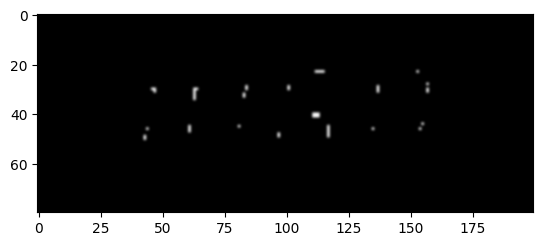

In [91]:
#Define the lower and upper bounds for the white color
# Since white is (255, 255, 255) in BGR, use a range close to it
# image = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/prediction_frames/2023-09-04_17:01:59_1078.png'
img = cv2.imread(test)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold_image = cv2.threshold(img, 235, 255, cv2.THRESH_BINARY)
# scale_factor = 3
# new_width = int(img.shape[1] * scale_factor)
# new_height = int(img.shape[0] * scale_factor)
plt.imshow(threshold_image, cmap = 'gray', interpolation = 'bicubic')
upscaled_image = cv2.resize(threshold_image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
# crop = img[545:635, 770:1020]
# plt.imshow(crop, cmap = 'gray', interpolation = 'bicubic')
ocr = reader.readtext(threshold_image, allowlist='0123456789', paragraph = True)
ocr

In [90]:
test = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/cropped_datetime/2023-09-04_17:01:59.png'

In [2]:
red0 = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/cropped_datetime/2023-09-04_17:01:59.png'
redb = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/cropped_datetime/2023-09-04_17:40:45.png'
whiteb = '/home/jessica/reading-kiln-termostat/data/processed_recordings/29-08-2023-esmalte/prediction_frames/2023-08-29_17:22:32_1201.png'
white0 = '/home/jessica/reading-kiln-termostat/data/processed_recordings/01-08-2024-esmalte/prediction_frames/2024-08-01_22:26:00_1158.png'
red2 = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/cropped_datetime/2023-09-04_17:02:59.png'

In [5]:
def prepimage(image):
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Calculate the average brightness by taking the mean of the grayscale pixel values
    average_brightness_value = np.mean(grayscale)
    print(average_brightness_value)
    _, threshold_image = cv2.threshold(image, 235, 255, cv2.THRESH_BINARY)
    plt.imshow(threshold_image, cmap = 'gray', interpolation = 'bicubic')
    return threshold_image

In [42]:
cv2.imread(red0).shape

(80, 200, 3)

79.3475


[([[68, 12], [168, 12], [168, 68], [68, 68]], '138', 0.5699179988121702)]

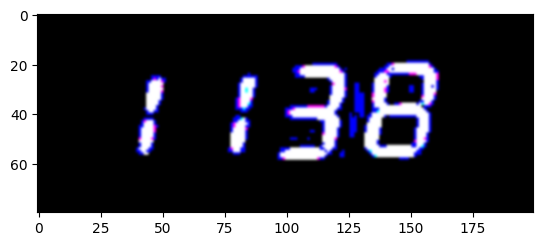

In [6]:
reader.readtext(prepimage(cv2.imread(redb)))

34.2610625


[([[32, 13], [168, 13], [168, 70], [32, 70]], '1080', 0.22875402867794037)]

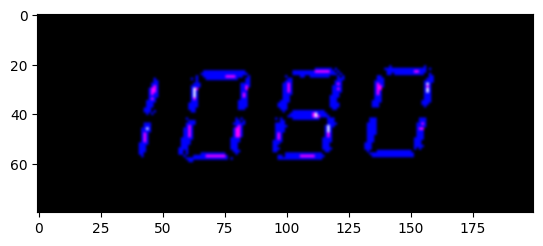

In [7]:
reader.readtext(prepimage(cv2.imread(red0)))

110.88493333333334


[([[49, 13], [203, 13], [203, 81], [49, 81]], '1158', 0.6847197413444519)]

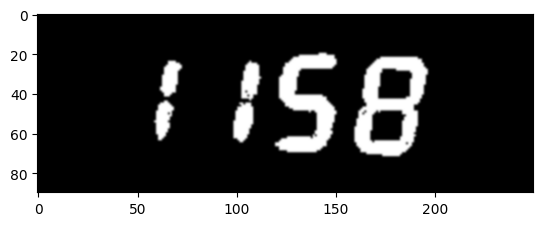

In [60]:
reader.readtext(prepimage(cv2.imread(white0)))

174.34118055555555


[([[13, 9], [155, 9], [155, 74], [13, 74]], '120 !', 0.7803422590412588)]

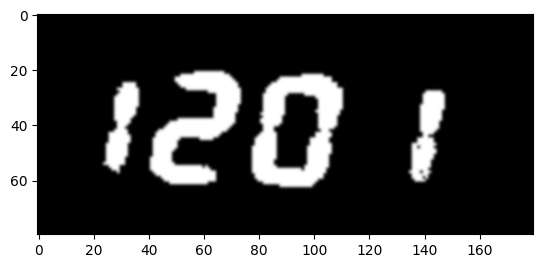

In [63]:
reader.readtext(prepimage(cv2.imread(whiteb)))

32.939125


[([[33, 15], [167, 15], [167, 67], [33, 67]], '1082', 0.9451003670692444)]

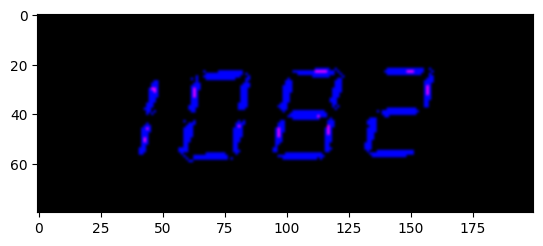

In [62]:
reader.readtext(prepimage(cv2.imread(red2)))

In [67]:
img = '/home/jessica/reading-kiln-termostat/data/processed_recordings/04-09-2023-esmalte/frames/12_240.png'
# img = cv2.imread(img)
# ocr = reader.readtext(img)
# ocr

In [ ]:
def find_bounding_box(image):
    ocr = reader.readtext(img)

In [13]:
img = '/home/jessica/reading-kiln-termostat/data/processed_recordings/29-08-2024-esmalte/frames/86_180.png'
img = cv2.imread(img)
ocr = reader.readtext(img)
ocr

[([[45, 49], [293, 49], [293, 93], [45, 93]],
  '2024-08-29',
  0.4471183194021304),
 ([[309, 49], [509, 49], [509, 93], [309, 93]],
  '22: 33:56',
  0.9804873755573716),
 ([[856, 476], [994, 476], [994, 550], [856, 550]],
  "'858",
  0.3442777097225189),
 ([[876, 566], [966, 566], [966, 622], [876, 622]],
  '98 1',
  0.19430155302102273),
 ([[636, 646], [796, 646], [796, 724], [636, 724]],
  'STEcvo',
  0.36028594423792515),
 ([[1135, 705], [1217, 705], [1217, 767], [1135, 767]],
  'SS',
  0.9800585455711333)]

[([[11, 9], [180, 9], [180, 72], [11, 72]], '44a95', 0.17175045296363428)]

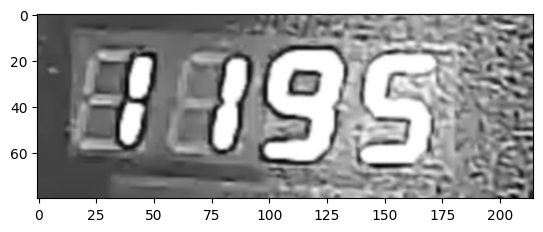

In [30]:
img = cv2.imread('/home/jessica/reading-kiln-termostat/data/processed_recordings/16-04-2024-esmalte/frames/16_60.png')
cropped = img[510:590, 920:1135]
plt.imshow(cropped, cmap = 'gray', interpolation = 'bicubic')
-25, +20, -30, +30
ocr = reader.readtext(cropped)
ocr

In [63]:
def white_mask(image):
    lower_white = np.array([220, 220, 240], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask to filter out white pixels
    mask = cv2.inRange(image, lower_white, upper_white)

    # Optionally, apply the mask to the original image to extract only white areas
    return cv2.bitwise_and(image, image, mask=mask)

[[[[46, 10], [206, 10], [206, 82], [46, 82]], '1284']]

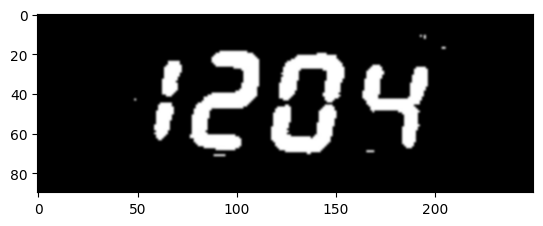

In [64]:
img = cv2.imread(image)
img = white_mask(img)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
ocr = reader.readtext(img, allowlist='0123456789', paragraph = True)
ocr